In [85]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


%matplotlib inline

In [39]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [62]:
def run_forest(tree_num,depth,numfeatures):
    test_err = []
    train_err = []
    ytrain = 'y_train{}.npy'
    xtrain = 'X_train_{}.npy'
    ytest = 'y_test_{}.npy'
    xtest = 'X_test_{}.npy'
    for i in range(3): 

        y_train = np.load(ytrain.format(i)).reshape(-1)
        name = 'X_train_'+ str(i) + '.npy'
        x_train = np.load(xtrain.format(i)).reshape(len(y_train),-1)
        model = RandomForestRegressor(n_estimators=tree_num,max_features=numfeatures, bootstrap = False,
                                   max_depth=depth)
        model.fit(x_train, y_train)
        y_test = np.load(ytest.format(i)).reshape(-1)
        x_test = np.load(xtest.format(i)).reshape(len(y_test),-1)
        y_hat = model.predict(x_test)
        print(y_hat)
        idx = y_test != 0
        test_err.append(metric (y_test[idx],y_hat[idx]))
        y_hat = model.predict(x_train)
        idx = y_train != 0
        train_err.append(metric (y_train[idx],y_hat[idx]))
        
   
    return test_err,train_err, model

In [41]:
testerr,trainerr=run_forest(100,16,14)

[ 4226.31029657 10591.19776513  4627.92506621 ...  9336.55203282
  3957.3435108   3112.9943557 ]
[9311.32789429 8652.81844717 4955.78471005 ... 4164.643232   6448.93621739
 5389.38717622]
[6656.22667524 6930.42435227 6776.4489819  ... 6052.8584268  8998.00751415
 7052.6504017 ]


In [44]:
testerr

[13.613340159577504, 13.435270860328085, 14.353581615424002]

In [45]:
trainerr


[12.79722042760723, 13.160765933038968, 13.343593105136994]

### testing on num features revealed that under 100 trees and 10 depth 16 features was best

In [51]:
numfeatures=[4,8,12,16]
testerr=[]
trainerr=[]
for num in numfeatures:
    tester,trainer=run_forest(100,10,num)
    testerr.append(np.mean(tester))
    trainerr.append(np.mean(trainer))
        

[4598.04752163 9813.58778773 4706.98450864 ... 8975.33070778 5025.69545573
 4288.23695556]
[8490.03706375 8315.49398779 4723.41852462 ... 4591.68770435 6591.72272185
 5415.33841861]
[6067.68382675 7565.74420162 6203.30360707 ... 6458.10982843 8809.20633846
 7885.30352215]
[ 4236.32513058 10521.19501186  4632.79133613 ...  9377.70278126
  4114.30518947  3516.30584996]
[8955.1479239  8565.58056924 4794.78719287 ... 4262.99499867 6406.15053745
 5308.27047092]
[6392.84648544 7234.2063102  6359.93219369 ... 5921.36756296 8853.55732514
 7348.69543305]
[ 4209.27840592 10702.62770528  4665.34917648 ...  9563.17148488
  4043.96836149  3153.77033539]
[9251.1135357  8745.88575923 4884.55670782 ... 4176.05506766 6414.11833538
 5364.09268452]
[6513.15021562 6954.80934136 6613.52931671 ... 5945.52545561 8934.94549043
 7042.12803289]
[ 4260.04185353 10543.1224265   4619.42915649 ...  9477.14686209
  4010.6049908   3090.17004604]
[9351.60590113 8655.62293717 4904.85248803 ... 4130.95034553 6462.177729

In [52]:
testerr

[18.58405755518362, 14.790968279584794, 13.900278705660313, 13.787394924403579]

In [54]:
trainerr

[17.282034347507082, 13.912703450990554, 13.193055600081486, 13.10401265439984]

### exploring different depths with 100 trees and 16 features depth 18 so far best 

In [59]:
depth=[18,21,23]
testerr=[]
trainerr=[]
for num in depth:
    tester,trainer=run_forest(100,num,16)
    testerr.append(np.mean(tester))
    trainerr.append(np.mean(trainer))

[ 4087.89328652 10462.11125078  4131.30588966 ...  8152.22724666
  3976.85492106  3209.63460887]
[9344.60918426 8545.64814158 5334.10972226 ... 3909.44541939 6529.17305536
 5493.34848981]
[6346.85497745 7032.15626807 6633.57159597 ... 5819.05716709 9192.24626605
 6928.36200977]
[ 4047.70826065 10512.91096903  4069.6092125  ...  8096.415
  3962.1180672   3171.44098195]
[9706.57810944 8602.0587786  5392.82516212 ... 3877.97893637 6578.77108578
 5653.80522462]
[6521.58072467 6879.39278145 6728.84782432 ... 5814.39428163 9458.29837547
 6784.0014885 ]
[ 3997.57562277 10474.64235714  4030.94960654 ...  8165.905
  3956.33187715  3191.9449504 ]
[9750.18099684 8636.95622363 5489.35299357 ... 3925.02252829 6560.59650915
 5754.26306391]
[6690.46662641 6880.55920775 6721.27270826 ... 5719.2645272  9475.89475212
 6801.26088152]


In [57]:
trainerr

[15.35691635057264, 13.10000536098284, 9.932953366927945, 6.531177646951118]

In [58]:
testerr

[15.648941390612402, 13.782293539418943, 11.497759775955501, 9.529934635562435]

In [60]:
trainerr

[4.598173150803049, 2.419134462202179, 1.427799179137715]

In [61]:
testerr

[8.83344579246486, 8.469836878916103, 8.435498837034514]

In [68]:
def plot_feature_importances(rf, cols, model_dir):
    importances = pd.DataFrame()
    importances.loc[:, 'importances'] = rf.feature_importances_
    importances.loc[:, 'features'] = cols
    importances.sort_values('importances', inplace=True)
    f, a = plt.subplots()
    importances.plot(ax=a, kind='bar', x='features', y='importances')
    plt.gcf().subplots_adjust(bottom=0.3)
    f.savefig(os.path.join(model_dir, 'importances.png'))

In [67]:
cols=pd.read_csv('columns.csv')
cols=cols.iloc[:,1].to_list()
tester,trainer,model = run_forest(100,18,16)

plot_feature_importances(model, cols, os.getcwd())

[ 4097.78248614 10529.08826312  4232.70936662 ...  8226.26238643
  3961.84950918  3206.03895379]
[9283.50581859 8571.8531394  5326.13107926 ... 3902.24247829 6533.03442814
 5417.77897724]
[6482.93567633 7031.3713635  6614.95107317 ... 5874.28690919 9193.98954532
 6885.51321235]


NameError: name 'pwd' is not defined

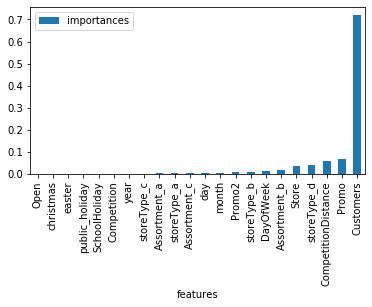

In [99]:
cols=cols.iloc[:,1].to_list()
plot_feature_importances(model, cols, os.getcwd())


In [100]:
trainerr

[4.598173150803049, 2.419134462202179, 1.427799179137715]

In [102]:
tester,trainer,model = run_forest(150,18,16)

[ 4120.06501177 10490.28411892  4222.36681875 ...  8132.26758586
  3938.22689441  3190.37762843]
[9420.57687912 8551.51857495 5348.07993349 ... 3904.73618079 6488.85361177
 5406.57289968]
[6503.62399565 7012.68479507 6611.89816127 ... 5881.51181808 9225.74702017
 6926.31842578]


In [103]:
trainerr

[4.598173150803049, 2.419134462202179, 1.427799179137715]

In [105]:
testerr

[8.83344579246486, 8.469836878916103, 8.435498837034514]